# K-Means Clustering Example

Let's make some fake data that includes people clustered by income and age, randomly:

In [7]:
from numpy import random, array

#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    random.seed(10)
    pointsPerCluster = float(N)/k
    X = []
    for i in range (k):
        incomeCentroid = random.uniform(20000.0, 200000.0)
        ageCentroid = random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([random.normal(incomeCentroid, 10000.0), random.normal(ageCentroid, 2.0)])
    X = array(X)
    return X

We'll use k-means to rediscover these clusters in unsupervised learning:

[2 1 4 4 4 4 4 4 1 2 1 4 2 4 4 4 4 2 4 2 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0
 2 2 0 2 0 0 0 0 0 0 0 0 0 1 1 1 1 4 1 1 1 1 4 4 4 4 1 1 3 4 4 1 1 1 3 1 1
 4 3 1 1 1 3 3 1 3 1 3 1 1 3 1 4 1 3 1 3 3 1 1 1 3 3]


/var/folders/wp/6hdq_hlj1pn61wgsrxxtpnth0000gn/T/ipykernel_72174/2227919892.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import random, float


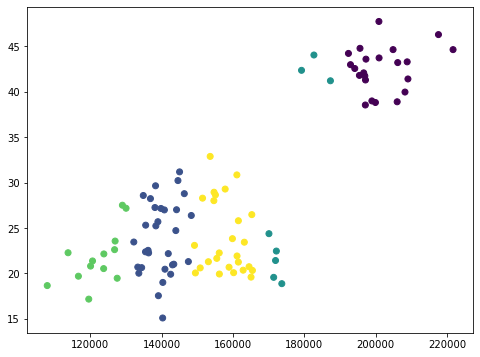

In [11]:
%matplotlib inline

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float

data = createClusteredData(100, 4)

model = KMeans(n_clusters=5)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(data)

# We can look at the clusters each data point was assigned to
print(model.labels_)

# And we'll visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(float))
plt.show()

## Activity

Things to play with: what happens if you don't scale the data? What happens if you choose different values of K? In the real world, you won't know the "right" value of K to start with - you'll need to converge on it yourself.